# Project 1 - Team 7


  
---

In [7]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as st

# Import API key
# from Key1 import api_key

# Pollution data files
pollution_data_usa_path = "Resources/Data USA.csv"
pollution_data_canada_path= "Resources/Data Canada.csv"
pollution_data_chile_path="Resources/Data Chile.csv"
pollution_data_colombia_path="Resources/Data Colombia.csv"
pollution_data_mexico_path="Resources/Data Mexico.csv"
latitudes_longitudes_path="Resources/Cities (Latitude-Longitude).csv"
population_data_path = "Resources/population_by_cities.csv"
northern_hemisphere_data_path = "Resources/Northern_Hemisphere_data.csv"
southern_hemisphere_data_path = "Resources\Southern_Hemisphere_data.csv"

# Read the pollution data
usa_pollution_data= pd.read_csv(pollution_data_usa_path)
canada_pollution_data= pd.read_csv(pollution_data_canada_path)
chile_pollution_data= pd.read_csv(pollution_data_chile_path)
colombia_pollution_data= pd.read_csv(pollution_data_colombia_path)
mexico_pollution_data= pd.read_csv(pollution_data_mexico_path)
file_latitude_longitude= pd.read_csv(latitudes_longitudes_path,encoding='ISO-8859-1')
population_data = pd.read_csv(population_data_path)
northern_hemisphere_data = pd.read_csv(northern_hemisphere_data_path)
southern_hemisphere_data = pd.read_csv(southern_hemisphere_data_path)

In [8]:
#Concatenating all the datasets
total_pollution_data=pd.concat([usa_pollution_data, canada_pollution_data,chile_pollution_data,colombia_pollution_data,mexico_pollution_data])

In [9]:
#Show the total pollution data
total_pollution_data

,Country,Cities,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,13.8,13.0,12.6,12.8,11.8,12.4,11.6,12.1,...,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,18.1,16.0,16.4,15.4,14.8,15.8,14.3,15.5,...,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,15.1,15.3,14.2,13.6,12.5,13.8,12.9,13.2,...,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,14.0,13.1,13.4,14.0,12.8,13.4,12.4,12.4,...,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,11.0,10.5,12.3,11.1,11.1,11.3,11.2,11.0,...,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,30.7,25.4,24.9,25.3,23.3,23.5,24.1,23.6,...,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,25.4,22.0,22.6,22.3,20.7,21.3,21.6,21.4,...,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,23.5,20.6,21.0,20.6,19.1,20.1,20.1,19.6,...,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,21.1,20.1,21.2,19.6,17.7,17.8,19.2,18.6,...,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [10]:
#Reducing dataset (Only data 2010 until 2020)
total_pollution_data_2010_to_2020 = total_pollution_data.loc[:, ["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
total_pollution_data_2010_to_2020

 

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,20.0,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,17.6,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,16.3,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,15.8,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [11]:
#Merging with the file with latitude and longitude of every city

Merged_df=pd.merge(total_pollution_data_2010_to_2020,file_latitude_longitude,left_on=['Cities','Country'], right_on=['city','country'],how='inner')
Merged_df=Merged_df[["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020","lat","lng"]]

#Removing duplicates (Some cities have multiple latitudes and longitudes since they are big cities)

merged_df_no_duplicates = Merged_df.drop_duplicates(subset=["Country", "Cities"])

            

In [12]:
#Export the City_Data into a csv
merged_df_no_duplicates.to_csv("Resources/total pollution data 2010 to 2020.csv",index=False)

In [13]:
#Show the full merged dataframe
merged_df_no_duplicates

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,lat,lng
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0,40.6943,-73.9249
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9,34.1141,-118.4068
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7,41.8375,-87.6866
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6,38.9047,-77.0163
14,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5,37.7558,-122.4449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Mexico,Delicias,16.6,19.5,17.2,17.4,16.7,16.6,15.8,15.6,14.3,12.2,13.0,28.1931,-105.4717
315,Mexico,Tuxpan,19.1,21.5,19.2,19.9,19.0,19.1,18.6,17.6,16.1,14.6,14.8,19.5539,-103.3756
318,Mexico,Iguala de la Independencia,17.8,19.8,18.0,19.3,17.3,17.2,17.6,16.6,15.4,13.8,13.4,18.3450,-99.5383
319,Mexico,Uriangato,19.1,21.6,19.5,20.2,19.2,18.8,19.0,18.1,16.4,14.2,14.2,20.1333,-101.1667


In [14]:
# Dividing dataframe into northern and southern hemisphere for later calculating the temperatures of the seasons
# The dataframe is being divided since the northen and southern hemisphere have seasons on different times of the year

Northern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "United States") | (merged_df_no_duplicates['Country'] == "Canada")|(merged_df_no_duplicates['Country']=="Mexico")]
Southern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "Chile") | (merged_df_no_duplicates['Country'] == "Colombia")]

In [15]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-03-19","2010-06-20","2010-09-21","2010-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

NameError: name 'api_key' is not defined

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)



In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-03-19","2011-06-20","2011-09-21","2011-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)


#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)


#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)




In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-03-19","2012-06-20","2012-09-21","2012-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)


#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)


#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)

In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-03-19","2013-06-20","2013-09-21","2013-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-03-19","2014-06-20","2014-09-21","2014-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-03-19","2015-06-20","2015-09-21","2015-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-03-19","2016-06-20","2016-09-21","2016-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-03-19","2017-06-20","2017-09-21","2017-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-03-19","2018-06-20","2018-09-21","2018-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-03-19","2019-06-20","2019-09-21","2019-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [ ]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-03-19","2020-06-20","2020-09-21","2020-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [ ]:
#Resetting index of Northern Hemisphere Dataframe
Northern_hemisphere.reset_index(drop=True, inplace=True)

In [ ]:
#Adding all the dataframes for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Northern Hemisphere Dataframe

Northern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]




In [ ]:
# Complete Northern Hemisphere data with all weather data from 2010 to 2020
Northern_hemisphere.to_csv("Resources/Northern_Hemisphere_data.csv",index=False)

In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-09-22","2010-12-21","2010-03-01","2010-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [ ]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)

In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-09-22","2011-12-21","2011-03-01","2011-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)

#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)

#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-09-22","2012-12-21","2012-03-01","2012-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)

#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)

#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-09-22","2013-12-21","2013-03-01","2013-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-09-22","2014-12-21","2014-03-01","2014-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-09-22","2015-12-21","2015-03-01","2015-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-09-22","2016-12-21","2016-03-01","2016-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-09-22","2017-12-21","2017-03-01","2017-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-09-22","2018-12-21","2018-03-01","2018-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-09-22","2019-12-21","2019-03-01","2019-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [ ]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-09-22","2020-12-21","2020-03-01","2020-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [ ]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [ ]:
#Resetting index of Southern Hemisphere Dataframe
Southern_hemisphere.reset_index(drop=True, inplace=True)

In [ ]:
##Adding all the lists for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Southern Hemisphere Dataframe

Southern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]


In [ ]:
# Complete Southern Hemisphere data with all weather data from 2010 to 2020
Southern_hemisphere.to_csv("Resources/Southern_Hemisphere_data.csv",index=False)

NameError: name 'Southern_hemisphere' is not defined

In [17]:
# Selecting the columns representing pollution data for the years 2000 to 2020
total_pollution_df = total_pollution_data.loc[:, ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]

# Displaying the first few rows of the selected pollution data
total_pollution_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,13.8,13.0,12.6,12.8,11.8,12.4,11.6,12.1,10.7,9.7,...,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,18.1,16.0,16.4,15.4,14.8,15.8,14.3,15.5,14.1,12.6,...,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,15.1,15.3,14.2,13.6,12.5,13.8,12.9,13.2,12.9,11.4,...,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,14.0,13.1,13.4,14.0,12.8,13.4,12.4,12.4,11.3,9.8,...,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,11.0,10.5,12.3,11.1,11.1,11.3,11.2,11.0,11.9,9.4,...,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5


In [18]:
# Calculating the average pollution across all years
avg_polution_humidity = total_pollution_df.mean(axis=1)

# Adding the average pollution data for each city to the total pollution data
total_pollution_data['Avg pollution (2000-2020)'] = avg_polution_humidity

# Selecting the 'Cities' and 'Avg pollution (2000-2020)' columns and rounding the values to two decimal places
avg_polution_by_city = round(pd.DataFrame(total_pollution_data[["Cities", "Avg pollution (2000-2020)"]]), 2)

# Displaying the first few rows of the average pollution data by city
avg_polution_by_city.head()

,Cities,Avg pollution (2000-2020)
0,New York,10.21
1,Los Angeles,12.93
2,Chicago,11.72
3,Washington,10.56
4,San Francisco,9.77


In [19]:
# Extracting columns related to average wind speed for each season from the northern hemisphere data
northern_spring_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Spring 2010':'Average Wind Speed (m/s) Spring 2020']
northern_summer_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Summer 2010':'Average Wind Speed (m/s) Summer 2020']
northern_autumn_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Autumn 2010':'Average Wind Speed (m/s) Autumn 2020']
northern_winter_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Winter 2010':'Average Wind Speed (m/s) Winter 2020']

In [20]:
# Calculate mean of each row
northern_avg_spring_wind = northern_spring_wind_columns.mean(axis=1)
northern_avg_summer_wind = northern_summer_wind_columns.mean(axis=1)
northern_avg_autumn_wind = northern_autumn_wind_columns.mean(axis=1)
northern_avg_winter_wind = northern_winter_wind_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
northern_hemisphere_data['Avg Spring Wind Speed'] = northern_avg_spring_wind
northern_hemisphere_data['Avg Summer Wind Speed'] = northern_avg_summer_wind
northern_hemisphere_data['Avg Autumn Wind Speed'] = northern_avg_autumn_wind 
northern_hemisphere_data['Avg Winter Wind Speed'] = northern_avg_winter_wind

# Display the updated dataframe
northern_wind_data = pd.DataFrame(northern_hemisphere_data[["Cities", "Avg Spring Wind Speed", "Avg Summer Wind Speed", "Avg Autumn Wind Speed", "Avg Winter Wind Speed"]])
northern_wind_data.head()

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed
0,New York,22.927273,18.409091,19.481818,23.354545
1,Los Angeles,16.590909,17.436364,17.881818,13.572727
2,Chicago,28.036364,26.781818,26.172727,28.063636
3,Washington,21.936364,20.100000,18.654545,22.454545
4,San Francisco,23.727273,32.590909,31.054545,21.081818


In [21]:
# Selecting the average wind speed data for each season from the northern hemisphere wind data
northern_avg_wind = northern_wind_data[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']]

# Calculate the mean of the four columns
northern_avg_wind['Avg Annual Wind Speed(M/S)'] = northern_avg_wind[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
northern_avg_wind = pd.concat([northern_wind_data['Cities'], northern_avg_wind], axis=1)
northern_avg_wind.head()

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,New York,22.927273,18.409091,19.481818,23.354545,21.043182
1,Los Angeles,16.590909,17.436364,17.881818,13.572727,16.370455
2,Chicago,28.036364,26.781818,26.172727,28.063636,27.263636
3,Washington,21.936364,20.100000,18.654545,22.454545,20.786364
4,San Francisco,23.727273,32.590909,31.054545,21.081818,27.113636


In [22]:
# Extracting columns related to cities, average annual humidity and wind speed from the `northern_humidity_wind_data` data
northern_selected_avgs = northern_avg_wind[['Cities', 'Avg Annual Wind Speed(M/S)']]
northern_selected_avgs.head()

,Cities,Avg Annual Wind Speed(M/S)
0,New York,21.043182
1,Los Angeles,16.370455
2,Chicago,27.263636
3,Washington,20.786364
4,San Francisco,27.113636


In [23]:
# Extracting columns related to average wind speed for each season from the southern hemisphere data
southern_spring_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Spring 2010':'Average Wind Speed (m/s) Spring 2020']
southern_summer_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Summer 2010':'Average Wind Speed (m/s) Summer 2020']
southern_autumn_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Autumn 2010':'Average Wind Speed (m/s) Autumn 2020']
southern_winter_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Winter 2010':'Average Wind Speed (m/s) Winter 2020']

In [24]:
# Calculate mean of each row
southern_avg_spring_wind = southern_spring_wind_columns.mean(axis=1)
southern_avg_summer_wind = southern_summer_wind_columns.mean(axis=1)
southern_avg_autumn_wind = southern_autumn_wind_columns.mean(axis=1)
southern_avg_winter_wind = southern_winter_wind_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
southern_hemisphere_data['Avg Spring Wind Speed'] = southern_avg_spring_wind
southern_hemisphere_data['Avg Summer Wind Speed'] = southern_avg_summer_wind
southern_hemisphere_data['Avg Autumn Wind Speed'] = southern_avg_autumn_wind
southern_hemisphere_data['Avg Winter Wind Speed'] = southern_avg_winter_wind

# Display the updated dataframe
southern_wind_data = pd.DataFrame(southern_hemisphere_data[["Cities", "Avg Spring Wind Speed", "Avg Summer Wind Speed", "Avg Autumn Wind Speed", "Avg Winter Wind Speed"]])
southern_wind_data.head()

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed
0,Arica,21.236364,24.690909,25.036364,19.581818
1,Iquique,25.418182,31.100000,32.827273,24.090909
2,Calama,41.236364,42.600000,43.281818,38.927273
3,Antofagasta,24.427273,26.718182,24.563636,22.027273
4,Ovalle,20.909091,23.936364,20.581818,16.818182


In [25]:
# Selecting the average wind speed data for each season from the southern hemisphere wind data
southern_avg_wind = southern_wind_data[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']]

# Calculate the mean of the four columns
southern_avg_wind['Avg Annual Wind Speed(M/S)'] = southern_avg_wind[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
southern_avg_wind = pd.concat([southern_wind_data['Cities'], southern_avg_wind], axis=1)
southern_avg_wind.head()

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,Arica,21.236364,24.690909,25.036364,19.581818,22.636364
1,Iquique,25.418182,31.100000,32.827273,24.090909,28.359091
2,Calama,41.236364,42.600000,43.281818,38.927273,41.511364
3,Antofagasta,24.427273,26.718182,24.563636,22.027273,24.434091
4,Ovalle,20.909091,23.936364,20.581818,16.818182,20.561364


In [26]:
# Selecting the cities, average annual humidity and wind data from `southern_humidity_wind_data` data
southern_selected_avgs = southern_avg_wind[['Cities', 'Avg Annual Wind Speed(M/S)']]
southern_selected_avgs.head()

,Cities,Avg Annual Wind Speed(M/S)
0,Arica,22.636364
1,Iquique,28.359091
2,Calama,41.511364
3,Antofagasta,24.434091
4,Ovalle,20.561364


In [27]:
# Combining the selected average data from the northern and southern hemispheres along the rows
combined_data = pd.concat([northern_selected_avgs, southern_selected_avgs], axis=0, ignore_index=True)

# Display the combined dataset
combined_data = round(combined_data, 2)
combined_data.head()

,Cities,Avg Annual Wind Speed(M/S)
0,New York,21.04
1,Los Angeles,16.37
2,Chicago,27.26
3,Washington,20.79
4,San Francisco,27.11


In [28]:
# Selecting the 'Cities' and 'Avg Annual Wind Speed(M/S)' columns from the combined data
selected_wind_df = combined_data[['Cities','Avg Annual Wind Speed(M/S)']]

# Merging the selected wind speed data with the average pollution data by city on the 'Cities' column
merged_pollution_wind_data = pd.merge(selected_wind_df, avg_polution_by_city, on="Cities")

# Displaying the first few rows of the merged data
merged_pollution_wind_data.head()

,Cities,Avg Annual Wind Speed(M/S),Avg pollution (2000-2020)
0,New York,21.04,10.21
1,Los Angeles,16.37,12.93
2,Los Angeles,16.37,29.23
3,Chicago,27.26,11.72
4,Washington,20.79,10.56


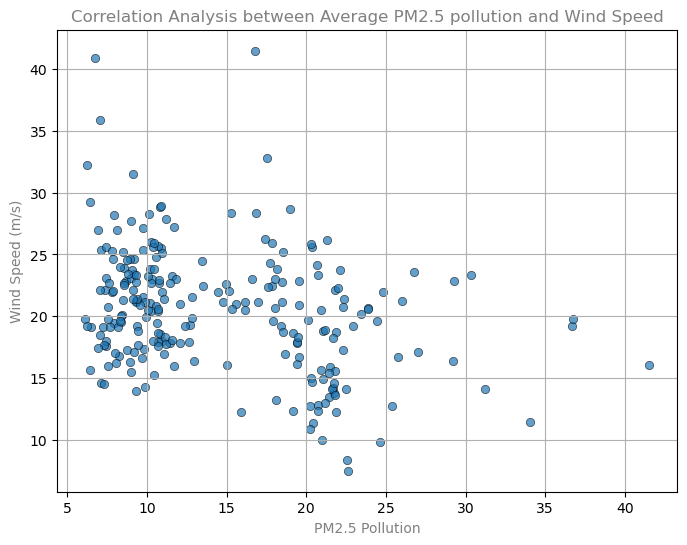

The correlation coefficient between PM2.5 Air Pollution and Wind Speed is: PearsonRResult(statistic=-0.3201382715553197, pvalue=4.259277786530547e-07)


In [29]:
# Calculating the correlation coefficient
correlation_coefficient = pearsonr(merged_pollution_wind_data['Avg pollution (2000-2020)'], merged_pollution_wind_data['Avg Annual Wind Speed(M/S)'])

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_pollution_wind_data, x='Avg pollution (2000-2020)', y='Avg Annual Wind Speed(M/S)', marker="o", edgecolor="black", alpha=0.7)
plt.title('Correlation Analysis between Average PM2.5 pollution and Wind Speed', color = 'gray')
plt.xlabel('PM2.5 Pollution', color = 'gray')
plt.ylabel('Wind Speed (m/s)', color = 'gray')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Display the plot
plt.show()


# Printing the correlation coefficient
print("The correlation coefficient between PM2.5 Air Pollution and Wind Speed is:", correlation_coefficient)

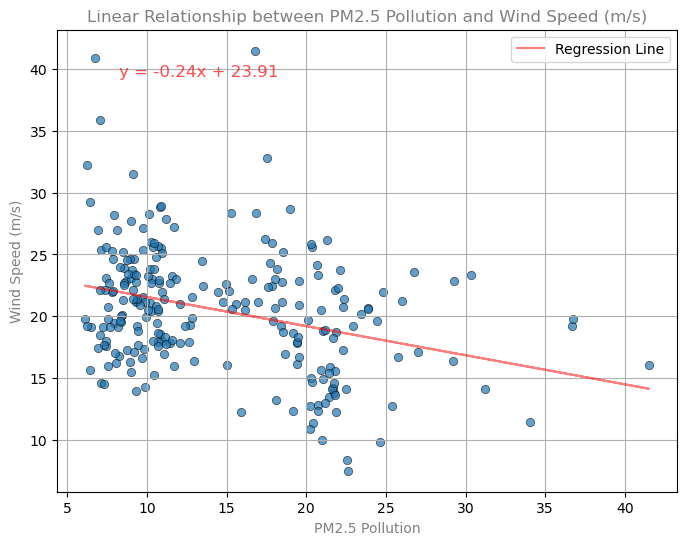

In [30]:
# Plotting the scatter plot for Humidity vs. Wind Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_pollution_wind_data,x='Avg pollution (2000-2020)', y='Avg Annual Wind Speed(M/S)', marker="o", edgecolor="black", alpha=0.7)

# Calculating the slope and intercept for the regression line
x_values = merged_pollution_wind_data['Avg pollution (2000-2020)']
y_values = merged_pollution_wind_data['Avg Annual Wind Speed(M/S)']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.5)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.title('Linear Relationship between PM2.5 Pollution and Wind Speed (m/s)', color='grey')
plt.xlabel('PM2.5 Pollution', color='grey')
plt.ylabel('Wind Speed (m/s)', color='grey')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")
plt.show()

In [31]:
# Add a constant term to the independent variable (humidity)
X = merged_pollution_wind_data['Avg pollution (2000-2020)']
y = merged_pollution_wind_data['Avg Annual Wind Speed(M/S)']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()


# Print the summary of the regression model
print("\nRegression Results:")
print(model.summary())


Regression Results:
                                OLS Regression Results                                
Dep. Variable:     Avg Annual Wind Speed(M/S)   R-squared:                       0.102
Model:                                    OLS   Adj. R-squared:                  0.099
Method:                         Least Squares   F-statistic:                     27.06
Date:                        Thu, 18 Apr 2024   Prob (F-statistic):           4.26e-07
Time:                                09:19:18   Log-Likelihood:                -707.76
No. Observations:                         239   AIC:                             1420.
Df Residuals:                             237   BIC:                             1426.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------

### Hypothesis:

Null Hypothesis (H0): 
- There is no significant linear relationship between PM2.5 pollution levels and wind speed.

Alternative Hypothesis (H1):
- There is a significant linear relationship between PM2.5 pollution levels and wind speed.

Based on the provided regression result:

Variables:

- Dependent Variable: Avg Annual Wind Speed(M/S)
- Independent Variable: Avg PM2.5 pollution levels

Based on the results: 
- The R-squared value of 0.102 indicates that approximately 10.2%  of the variability in wind speed can be explained by pollution levels.
- p-value = 4.259×10^−7, which is less than the conventional significance level of 0.05.

Conclusions:<br>

Overall, the regression model suggests that there is a statistically significant negative relationship between pollution levels and wind speed, with higher pollution levels associated with lower wind speeds. However, the relatively low R-squared value indicates that only a small proportion of the variability in wind speed is explained by pollution levels. Therefore, With such a small p-value, we reject the null hypothesis and conclude that there is a significant relationship between the predictor variable (pollution levels) and the outcome variable (wind speed)

In [32]:
# Merging population data and total pollution data based on the 'Cities' column
merged_pollution_population_data=pd.merge(population_data,total_pollution_data, on= 'Cities')
merged_pollution_population_data.head()

,Country_x,Cities,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,Avg pollution (2000-2020)
0,Canada,Toronto,"4,607,000","4,694,000","4,777,000","4,861,000","4,948,000","5,035,000","5,125,000","5,216,000",...,8.5,8.0,8.3,7.8,7.1,7.5,7.6,7.0,7.2,9.047619
1,United States,New York,"17,813,000","17,868,000","17,922,000","17,977,000","18,032,000","18,087,000","18,142,000","18,198,000",...,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0,10.214286
2,Colombia,Bogota,"6,329,000","6,512,000","6,701,000","6,894,000","7,094,000","7,299,000","7,510,000","7,727,000",...,19.0,19.9,19.4,18.7,18.2,18.6,16.7,15.0,14.9,20.204762
3,Chile,Santiago,"5,658,000","5,777,000","5,884,000","5,930,000","5,978,000","6,025,000","6,073,000","6,122,000",...,25.9,28.2,27.0,28.4,28.9,27.6,27.2,26.4,27.0,29.285714
4,Mexico,Mexico City,"18,457,000","18,618,000","18,780,000","18,944,000","19,110,000","19,276,000","19,444,000","19,614,000",...,25.2,25.9,24.2,23.8,23.4,22.5,20.6,18.2,17.8,26.742857


In [33]:
# Creating a DataFrame with population and pollution data for multiple cities over the years
selected_df = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "Toronto_population": [4607000, 4694000, 4777000, 4861000, 4948000, 5035000, 5125000, 5216000, 5309000, 5403000, 5499000, 5593000, 5660000, 5728000, 5797000, 5867000, 5938000, 6010000, 6082000, 6139000, 6197000],
    "New York_population": [17813000, 17868000, 17922000, 17977000, 18032000, 18087000, 18142000, 18198000, 18254000, 18309000, 18365000, 18421000, 18478000, 18534000, 18591000, 18648000, 18705000, 18762000, 18819000, 18805000, 18804000],
    "Bogota_population": [6329000, 6512000, 6701000, 6894000, 7094000, 7299000, 7510000, 7727000, 7951000, 8181000, 8418000, 8661000, 8912000, 9170000, 9435000, 9708000, 9989000, 10278000, 10574000, 10779000, 10978000],
    "Santiago_population": [5658000, 5777000, 5884000, 5930000, 5978000, 6025000, 6073000, 6122000, 6171000, 6220000, 6269000, 6319000, 6370000, 6420000, 6472000, 6523000, 6575000, 6628000, 6680000, 6724000, 6767000],
    "Mexico City_population": [18457000, 18618000, 18780000, 18944000, 19110000, 19276000, 19444000, 19614000, 19785000, 19958000, 20137000, 20372000, 20610000, 20850000, 21094000, 21340000, 21420000, 21500000, 21581000, 21672000, 21782000],
    "Toronto_pollution": [11.0, 11.7, 11.4, 10.9, 10.0, 11.4, 10.4, 9.8, 9.7, 8.3, 8.2, 8.2, 8.5, 8.0, 8.3, 7.8, 7.1, 7.5, 7.6, 7.0, 7.2],
    "New York_pollution": [13.8, 13.0, 12.6, 12.8, 11.8, 12.4, 11.6, 12.1, 10.7, 9.7, 9.5, 10.1, 9.2, 9.3, 8.8, 8.2, 8.1, 7.7, 7.7, 7.4, 8.0],
    "Bogota_pollution": [25.6, 22.9, 23.3, 23.1, 21.9, 21.0, 22.8, 22.2, 20.3, 19.1, 19.9, 21.8, 19.0, 19.9, 19.4, 18.7, 18.2, 18.6, 16.7, 15.0, 14.9],
    "Santiago_pollution": [33.5, 33.7, 32.8, 33.0, 31.3, 31.1, 31.5, 31.0, 29.7, 28.1, 26.1, 26.6, 25.9, 28.2, 27.0, 28.4, 28.9, 27.6, 27.2, 26.4, 27.0],
    "Mexico City_pollution": [43.2, 30.6, 31.3, 33.2, 28.4, 29.0, 30.1, 29.2, 26.7, 25.5, 24.9, 27.9, 25.2, 25.9, 24.2, 23.8, 23.4, 22.5, 20.6, 18.2, 17.8]
}

# Create a DataFrame with selected data
pollution_population_df = pd.DataFrame(selected_df)


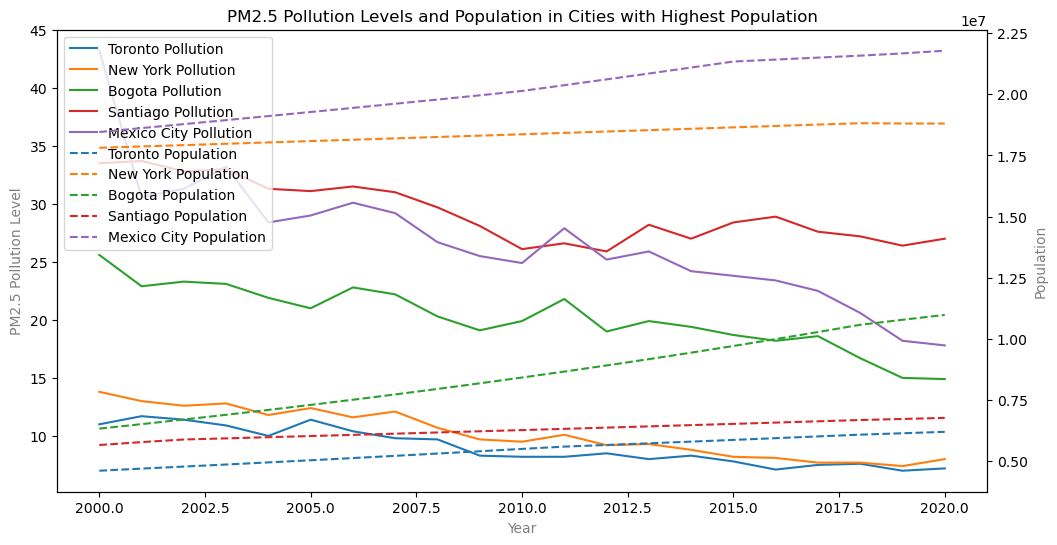

In [34]:
# List of cities with the highest population and pollution
cities = ['Toronto', 'New York', 'Bogota', 'Santiago', 'Mexico City']

# Plot pollution for each city
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a secondary y-axis to plot population
ax2 = ax1.twinx()

# Iterate over each city to plot pollution and population data
for city in cities:

    # Plot pollution data for the current city on the primary y-axis (ax1)
    ax1.plot(pollution_population_df['Year'], pollution_population_df[f'{city}_pollution'], label=f'{city} Pollution', linestyle='-')
    
    # Plot population data for the current city on the secondary y-axis (ax2)
    ax2.plot(pollution_population_df['Year'], pollution_population_df[f'{city}_population'], label=f'{city} Population', linestyle='--')

# Set labels for x-axis and y-axes
ax1.set_xlabel('Year', color = 'grey')
ax1.set_ylabel('PM2.5 Pollution Level', color='grey')
ax2.set_ylabel('Population', color='grey')

# Set title for the plot
ax1.set_title('PM2.5 Pollution Levels and Population in Cities with Highest Population')

# Combine legends from both axes into a single legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Save the figure
plt.savefig("Resources/Fig3.png")

# Display the plot
plt.show()

### Trend analysis findings:

- Population Growth: 
    - Overall, there is a general upward trend in population for all cities over the years. The population of each city seems to be increasing steadily, with varying rates of growth.

- Pollution Levels: 
    - The pollution levels, as indicated by PM2.5 pollution, show fluctuations over the years. While some cities exhibit a decreasing trend in pollution levels, others show a more erratic pattern with both increases and decreases.

Overall, further investigation is required to evaluate if there is a significant relation between population growth and pollution trends in each city.

In [35]:
# Specify the column names for population and pollution
population_column = 'Toronto_population'
pollution_column = 'Toronto_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:      Toronto_pollution   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           2.14e-11
Time:                        09:19:32   Log-Likelihood:                -13.694
No. Observations:                  21   AIC:                             31.39
Df Residuals:                      19   BIC:                             33.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const          

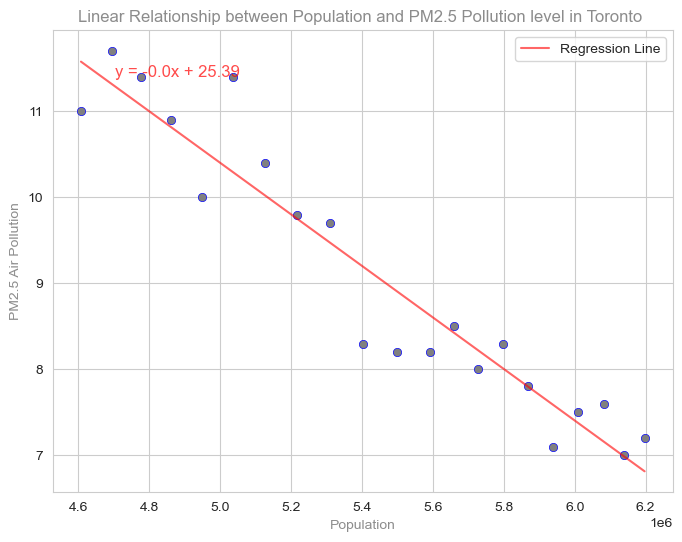

In [36]:
# Set seaborn style
sns.set_style("whitegrid")


# Plotting the scatter plot for Toronto population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Toronto_population', y='Toronto_pollution', color= 'grey', marker="o", edgecolor="blue", data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Toronto_population']
y_values = pollution_population_df['Toronto_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.6)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.xlabel('Population', color = 'gray', alpha=0.9)
plt.ylabel('PM2.5 Air Pollution', color = 'gray', alpha=0.9)
plt.title('Linear Relationship between Population and PM2.5 Pollution level in Toronto ', color = 'gray', alpha=0.9)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig4.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Toronto and the pollution levels in Toronto.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Toronto and the pollution levels in Toronto.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.910, which means that approximately 91.0% of the variance in Toronto_pollution is explained by the Toronto_population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Toronto and the pollution levels in Toronto.

In [37]:
# Specify the column names for population and pollution
population_column = 'New York_population'
pollution_column = 'New York_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

   # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     New York_pollution   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.2
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           6.61e-15
Time:                        09:19:40   Log-Likelihood:                -10.219
No. Observations:                  21   AIC:                             24.44
Df Residuals:                      19   BIC:                             26.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

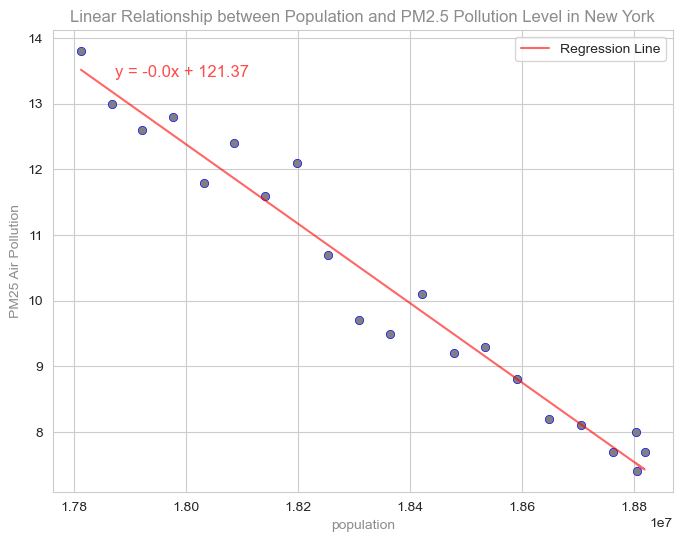

In [38]:
# Plotting the scatter plot for New York population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='New York_population', y='New York_pollution', color= 'grey', marker="o", edgecolor="blue", data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['New York_population']
y_values = pollution_population_df['New York_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.6)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.xlabel('population', color = 'gray', alpha=0.9)
plt.ylabel('PM25 Air Pollution', color = 'gray', alpha=0.9)
plt.title('Linear Relationship between Population and PM2.5 Pollution Level in New York', color = 'gray', alpha=0.9)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig5.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of New York and the pollution levels in New York.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of New York  and the pollution levels in New York.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.962, which means that approximately 96.2% of the variance in New York pollution is explained by the New York population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of New York and the pollution levels in New York.

In [39]:
# Specify the column names for population and pollution
population_column = 'Bogota_population'
pollution_column = 'Bogota_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:       Bogota_pollution   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.33e-09
Time:                        09:19:48   Log-Likelihood:                -29.741
No. Observations:                  21   AIC:                             63.48
Df Residuals:                      19   BIC:                             65.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const            

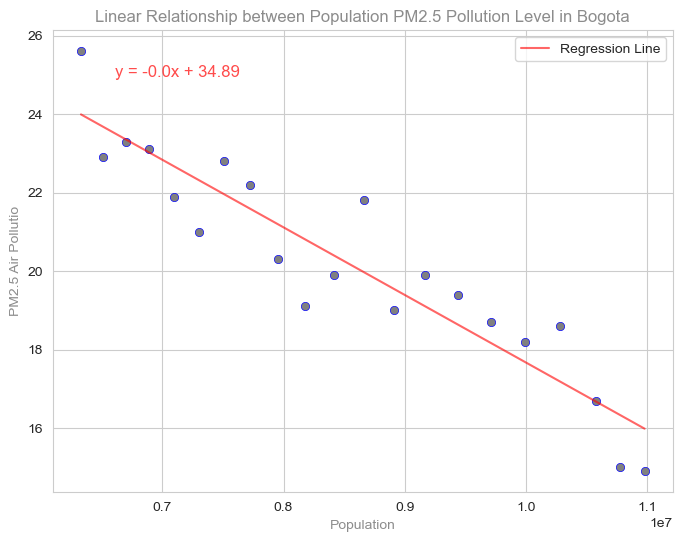

In [40]:
# Plotting the scatter plot for Bogota population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bogota_population', y='Bogota_pollution', color= 'grey', marker="o", edgecolor="blue", data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Bogota_population']
y_values = pollution_population_df['Bogota_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.6)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.xlabel('Population', color = 'gray', alpha=0.9)
plt.ylabel('PM2.5 Air Pollutio', color = 'gray', alpha=0.9)
plt.title('Linear Relationship between Population PM2.5 Pollution Level in Bogota', color = 'gray', alpha=0.9)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig6.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Bogota and the pollution levels in Bogota.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Bogota and the pollution levels in Bogota.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.862, which means that approximately 86.2% of the variance in Bogota pollution is explained by the Bogota population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Bogota and the pollution levels in Bogota.

In [41]:
# Specify the column names for population and pollution
population_columns = ['Santiago_population']
pollution_column = 'Santiago_pollution'  

# Check if the specified columns exist in the DataFram
if all(col in pollution_population_df.columns for col in population_columns) and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[population_columns]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     Santiago_pollution   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     50.92
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           8.76e-07
Time:                        09:19:55   Log-Likelihood:                -35.814
No. Observations:                  21   AIC:                             75.63
Df Residuals:                      19   BIC:                             77.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

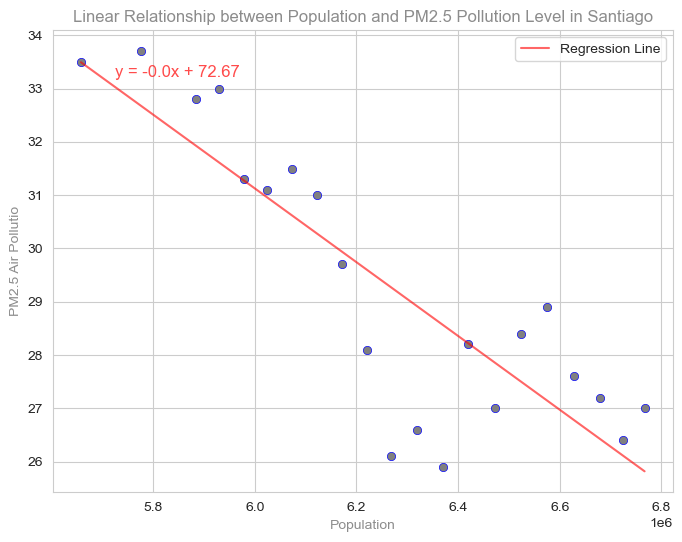

In [42]:
# Plotting the scatter plot for Santiago populationy vs. Santiago pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Santiago_population', y='Santiago_pollution', color= 'grey', marker="o", edgecolor="blue", data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Santiago_population']
y_values = pollution_population_df['Santiago_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.6)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.xlabel('Population', color = 'gray', alpha=0.9)
plt.ylabel('PM2.5 Air Pollutio', color = 'gray', alpha=0.9)
plt.title('Linear Relationship between Population and PM2.5 Pollution Level in Santiago', color = 'gray', alpha=0.9)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig7.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Santiago and the pollution levels in Santiago.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Santiago and the pollution levels in Santiago.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.728, which means that approximately 72.8% of the variance in Santiago pollution is explained by the Santiago population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Santiago and the pollution levels in Santiago.

In [43]:
# Specify the column names for population and pollution
population_columns = ['Mexico City_population']
pollution_column = 'Mexico City_pollution'  

# Check if the specified columns exist in the DataFram
if all(col in pollution_population_df.columns for col in population_columns) and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[population_columns]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                              OLS Regression Results                             
Dep. Variable:     Mexico City_pollution   R-squared:                       0.764
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     61.66
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):           2.21e-07
Time:                           09:20:02   Log-Likelihood:                -50.122
No. Observations:                     21   AIC:                             104.2
Df Residuals:                         19   BIC:                             106.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

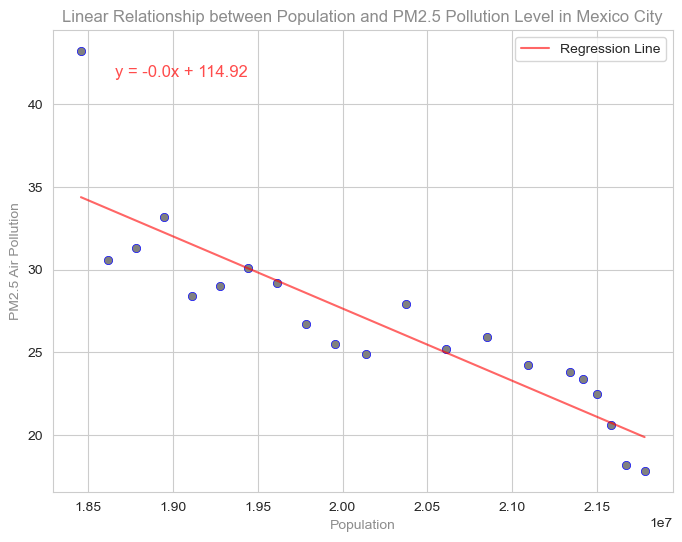

In [44]:
# Plotting the scatter plot for Mexico City population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mexico City_population', y='Mexico City_pollution', color= 'grey', marker="o", edgecolor="blue", data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Mexico City_population']
y_values = pollution_population_df['Mexico City_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line', alpha=0.6)

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red', alpha=0.7)

# Adding title and labels
plt.xlabel('Population', color = 'gray', alpha=0.9)
plt.ylabel('PM2.5 Air Pollution', color = 'gray', alpha=0.9)
plt.title('Linear Relationship between Population and PM2.5 Pollution Level in Mexico City', color = 'gray', alpha=0.9)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig8.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.764, which means that approximately 76.4% of the variance in Mexico City pollution is explained by the Mexico City population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.